In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import os
from keras import backend as K
from sklearn.metrics import mean_squared_error

In [2]:
trainDF = pd.read_csv("./input/avito-demand-prediction/train.csv")

trainDF.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [3]:
parent_cat_to_english = {
    'Личные вещи': 'personal things',
    'Для дома и дачи': 'For home and cottages',
    'Бытовая электроника': 'cellular electronics',
    'Транспорт': 'transport',
    'Недвижимость': 'the property',
    'Животные': 'animals',
    'Хобби и отдых': 'hobbies and recreation',
    'Услуги': 'the services', 
    'Для бизнеса': 'for business'
}

cell_elec_cats = {
    'Аудио и видео': 'audio and video',
    'Игры, приставки и программы': 'Games, consoles and programs',
    'Настольные компьютеры': 'desktop pc',
    'Ноутбуки': 'laptop',
    'Оргтехника и расходники': 'office equipment and consumables',
    'Планшеты и электронные книги': 'tablets and ebooks',
    'Телефоны': 'phones',
    'Товары для компьютера': 'computer products',
    'Фототехника': 'photographic equipment'
}

for_business_cats = {
    'Готовый бизнес': 'ready business',
    'Оборудование для бизнеса': 'equipment for business'
}

for_homes_and_cot_cats = {
    'Бытовая техника': 'appliances',
    'Мебель и интерьер': 'furnature and interior',
    'Посуда и товары для кухни': 'dishes and products for the kitchen',
    'Продукты питания': 'food',
    'Растения': 'plants',
    'Ремонт и строительство': 'repair and construction'
}

animal_cats = {
    'Аквариум': 'aquarium',
    'Другие животные': 'other animals',
    'Кошки': 'cats',
    'Птицы': 'birds',
    'Собаки': 'dogs',
    'Товары для животных': 'goods for pets'
}

personal_things_cats = {
    'Детская одежда и обувь': 'childrens clothing and footwear',
    'Красота и здоровье': 'beauty and health',
    'Одежда, обувь, аксессуары': 'clothes shoes accessories',
    'Товары для детей и игрушки': 'goods for children and toys',
    'Часы и украшения': 'watches and jewelry'
}

the_property_cats = {
    'Гаражи и машиноместа': 'garages and parking places',
    'Дома, дачи, коттеджи': 'houses and cottages',
    'Земельные участки': 'land',
    'Квартиры': 'apartment',
    'Коммерческая недвижимость': 'commercial property',
    'Комнаты': 'rooms',
    'Недвижимость за рубежом': 'propery abroad'
}

transport_cats = {
    'Автомобили': 'cars',
    'Водный транспорт': 'water transport',
    'Грузовики и спецтехника': 'trucks and special equipment',
    'Мотоциклы и мототехника': 'motorcycle and equipment'
}

services_cats = {
    'Предложение услуг': 'offer of services'
}

hobbies_and_req = {
    'Билеты и путешествия': 'tickets and travel',
    'Велосипеды': 'bicycles',
    'Книги и журналы': 'books and mags',
    'Коллекционирование': 'collecting',
    'Музыкальные инструменты': 'musical instruments',
    'Охота и рыбалка': 'hunting and fishing',
    'Спорт и отдых': 'sport and leisure'
}

subCats = {**cell_elec_cats,**for_business_cats,**for_homes_and_cot_cats,
           **animal_cats,**personal_things_cats,**the_property_cats,**transport_cats,**services_cats,**hobbies_and_req}

trainDF["category_name"] = trainDF["category_name"].map(lambda x: subCats[x])

In [4]:
cats = trainDF["category_name"].unique()

childrenAndToys = trainDF[trainDF["category_name"]==cats[0]].sample(frac=1)

# Goods for Children and Toys - Товары для детей и игрушки

In [5]:
nItems = childrenAndToys.shape[0]
nValidation = int(nItems * 0.2)
print("Number of samples in the category Goods for Children and Toys: {0}".format(nItems))
print("Number of samples in the test set: {0}".format(nItems-nValidation))
print("Number of samples in the validation set: {0}".format(nValidation))

Number of samples in the category Goods for Children and Toys: 99747
Number of samples in the test set: 79798
Number of samples in the validation set: 19949


In [6]:
nValidation = int(nItems * 0.2)
childrenAndToys_validation = childrenAndToys[0:nValidation]
childrenAndToys_train      = childrenAndToys[nValidation:]

### Comparing the validation and training sets. 

Validation
count    19949.000000
mean         0.200376
std          0.322503
min          0.000000
25%          0.000000
50%          0.000000
75%          0.262110
max          0.803230
Name: deal_probability, dtype: float64


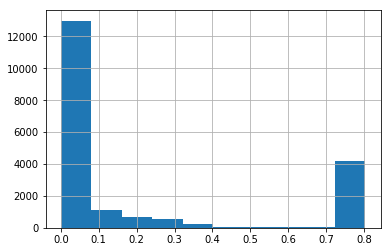

Test
count    79798.000000
mean         0.197963
std          0.320472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.255620
max          0.803230
Name: deal_probability, dtype: float64


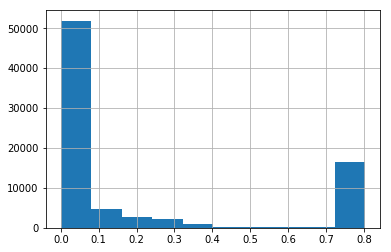

In [7]:
print("Validation")
print(childrenAndToys_validation["deal_probability"].describe())
childrenAndToys_validation["deal_probability"].hist()
plt.show()

print("Test")
childrenAndToys_train["deal_probability"].hist()
print(childrenAndToys_train["deal_probability"].describe())
plt.show()

In [8]:
print("Percentage of Missing Values")

trainMissing = childrenAndToys_train.isna().sum()/childrenAndToys_train.shape[0]
valMissing   =  childrenAndToys_validation.isna().sum()/childrenAndToys_validation.shape[0]
pd.DataFrame({"Training":trainMissing,
              "Validation":valMissing})

Percentage of Missing Values


,Training,Validation
item_id,0.000000,0.000000
user_id,0.000000,0.000000
region,0.000000,0.000000
city,0.000000,0.000000
parent_category_name,0.000000,0.000000
category_name,0.000000,0.000000
param_1,0.003120,0.002607
param_2,1.000000,1.000000
param_3,1.000000,1.000000
title,0.000000,0.000000


### Analysis of the Training Set

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
childrenAndToys_train_price = childrenAndToys_train[~childrenAndToys_train["price"].isna()]["price"]
childrenAndToys_train_price.describe()

count      78552.000
mean        3878.041
std        84953.549
min            0.000
25%          500.000
50%         1500.000
75%         3500.000
max     15001800.000
Name: price, dtype: float64

x <= 25%


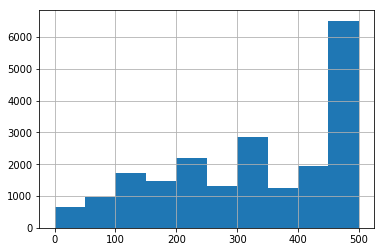

25% < x <= 50%


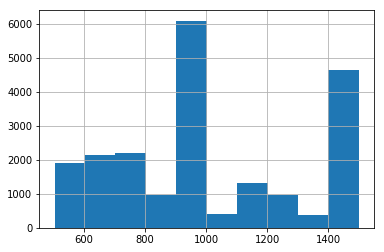

50% < x <= 75%


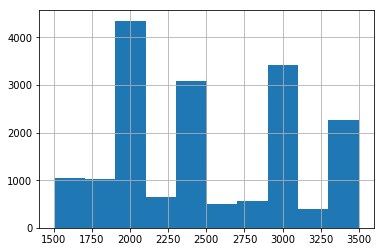

> 75%


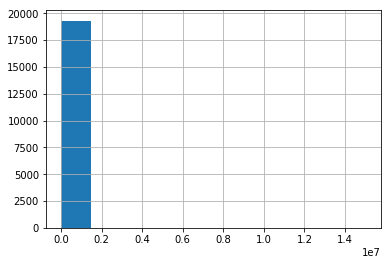

In [10]:
print("x <= 25%")
childrenAndToys_train_price[childrenAndToys_train_price<=500].hist()
plt.show()

print("25% < x <= 50%")
childrenAndToys_train_price[(childrenAndToys_train_price>500) & (childrenAndToys_train_price<=1500)].hist()
plt.show()

print("50% < x <= 75%")
childrenAndToys_train_price[(childrenAndToys_train_price>1500) & (childrenAndToys_train_price<=3500)].hist()
plt.show()

print("> 75%")
childrenAndToys_train_price[(childrenAndToys_train_price>3500)].hist()
plt.show()

50% < x <= 75%


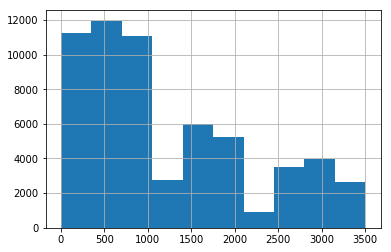

In [11]:
print("50% < x <= 75%")
childrenAndToys_train_price[(childrenAndToys_train_price<=3500)].hist()
plt.show()

In [12]:
def countInPercentiles(df,
                       percentiles = [(0,.1),(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]):
    counts = []
    for p in percentiles:
        res = df[(df["deal_probability"] >= p[0]) & (df["deal_probability"] <= p[1]) ]["item_id"].count()
        counts.append(res)

    return plt.bar(range(len(percentiles)),counts)
    

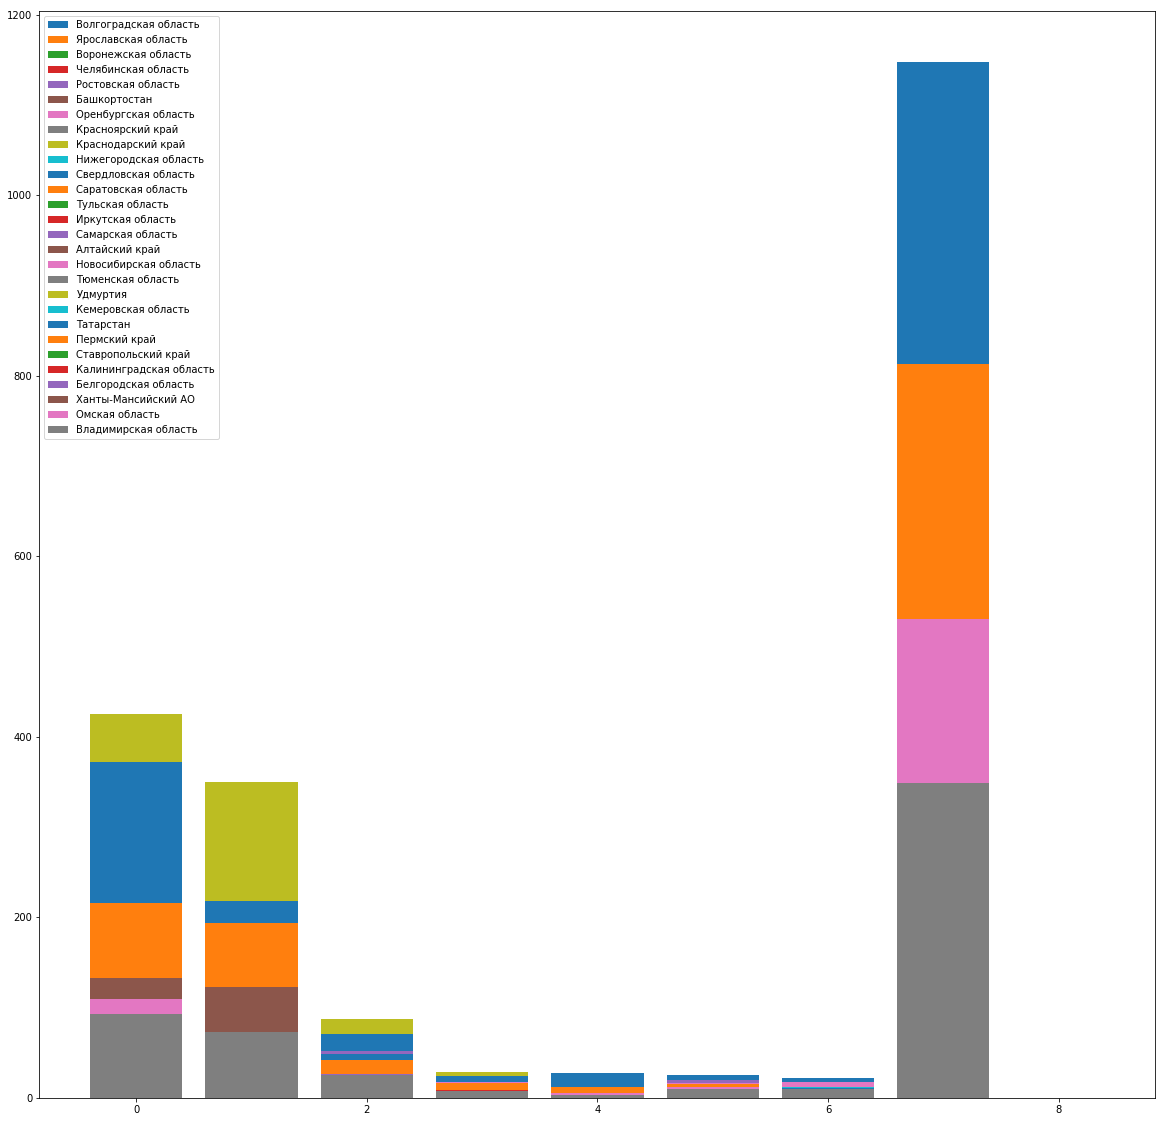

In [13]:
regions = childrenAndToys_train["region"].unique()
    
plt.figure(figsize=(20,20))
artists = []
idx = 1
for region in regions:
    df = childrenAndToys_train[childrenAndToys_train["region"] == region]
    artist = countInPercentiles(df,[(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)])
    artists.append(artist)
    idx+=1
    
plt.legend(artists, regions)

plt.show()

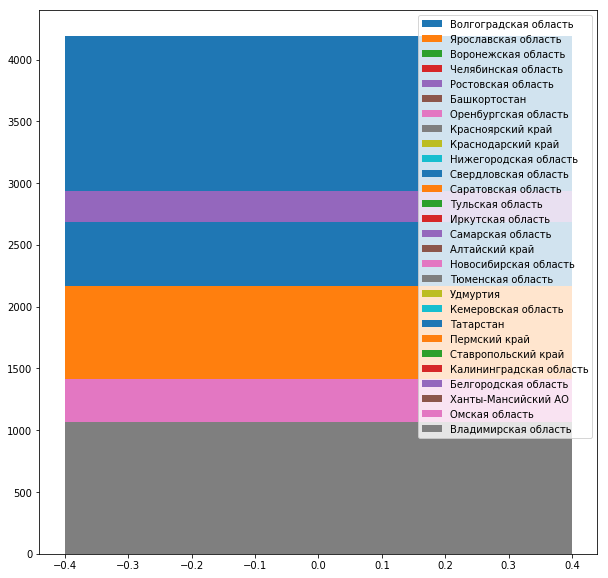

In [14]:
plt.figure(figsize=(10,10))
idx = 1
artists = []
for region in regions:
    df = childrenAndToys_train[childrenAndToys_train["region"] == region]
    artist = countInPercentiles(df,[(.0,.1)])
    artists.append(artist)
    idx+=1

plt.legend(artists, regions)
plt.show()

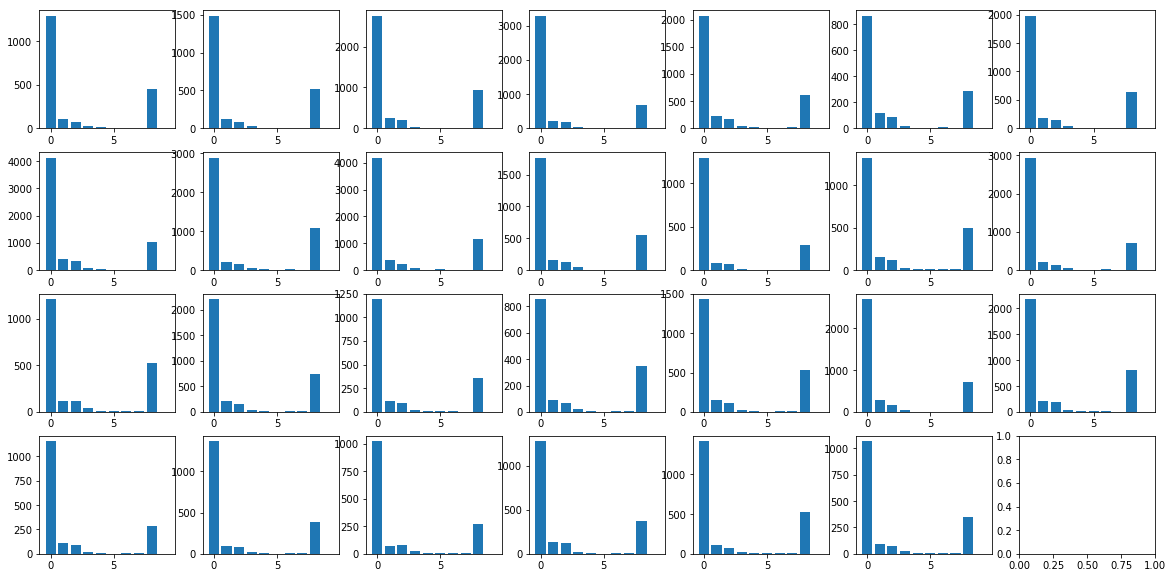

In [15]:
cities = childrenAndToys_train["region"].unique()
cityIDMap = dict.fromkeys(cities,0)
                 
plt.figure(figsize=(20,10))
idx = 1
dfs = []
for city in cities:
    df = childrenAndToys_train[childrenAndToys_train["region"] == city]
    dfs.append(df["deal_probability"].mean())
    cityIDMap[city]=df["deal_probability"].mean()
    countInPercentiles(df)
    plt.subplot(4,7,idx)
    idx+=1

plt.show()

# $$ P(\text{deal_probability }  \lvert  \text{ region} ) = 0.20221177690033842$$

In [17]:
cache = {}

In [18]:
def deal_prob(given):    
    if "region" in given:
        region = given["region"]
        if region == None:
            if not (("region",region) in cache):
                cache[("region",region)] = childrenAndToys_train["deal_probability"].mean()
        else:
            if not (("region",region) in cache):
                cache[("region",region)]  = childrenAndToys_train[childrenAndToys_train["region"] == region]["deal_probability"].mean()

        return cache[("region",region)] 

In [75]:
p = lambda x : deal_prob({"region":x["region"]})
tmp = mean_squared_error(childrenAndToys_validation["deal_probability"],
                                childrenAndToys_validation.apply(p,axis=1))
print(tmp)

0.10344170612917983


In [163]:
from keras.layers import Dense, Input
from keras.models import Model

inp = Input(shape=(1, ))
x = Dense(10,activation="sigmoid")(inp)
x = Dense(1,activation="sigmoid")(x)

model = Model(inp,x)
model.compile(loss='mse',optimizer='adam')

In [207]:
df = childrenAndToys_train[~childrenAndToys_train["price"].isnull() ]

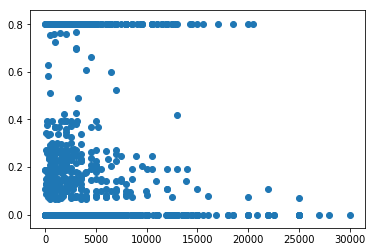

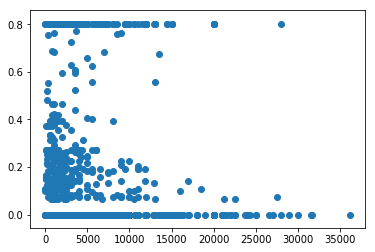

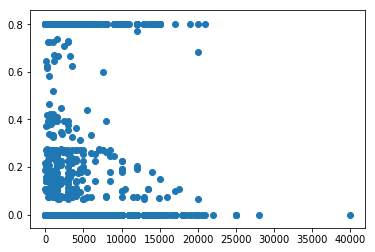

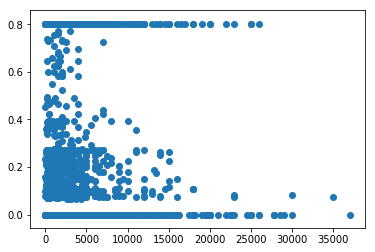

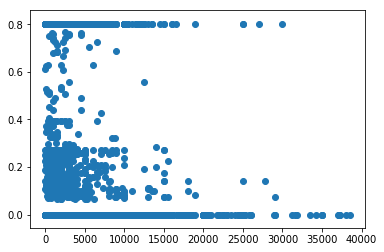

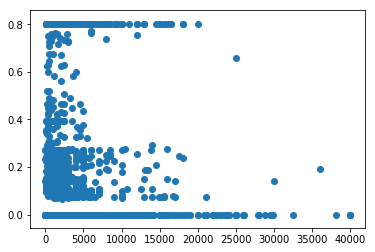

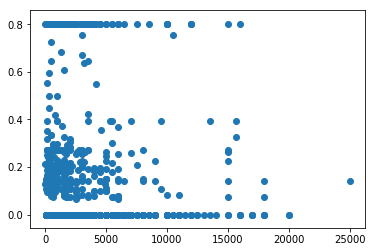

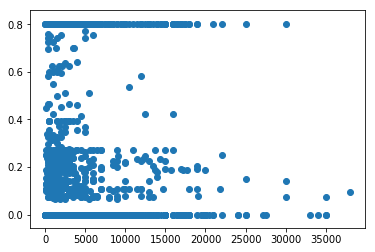

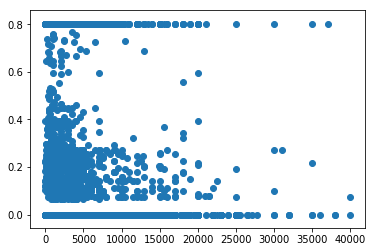

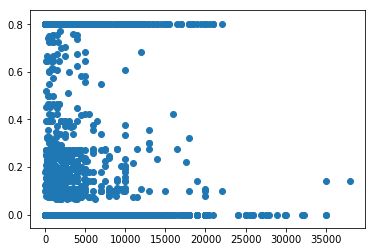

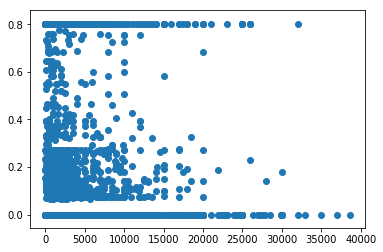

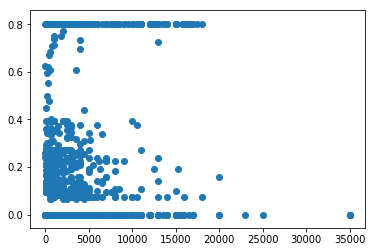

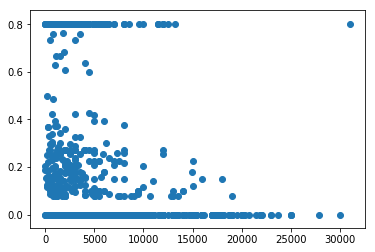

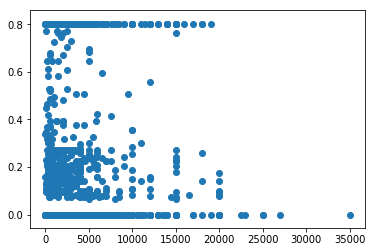

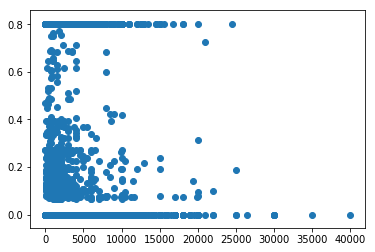

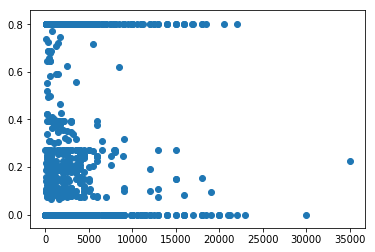

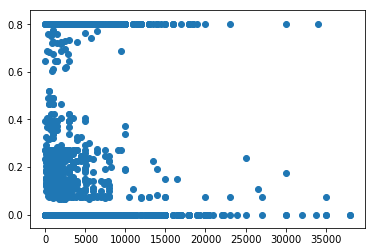

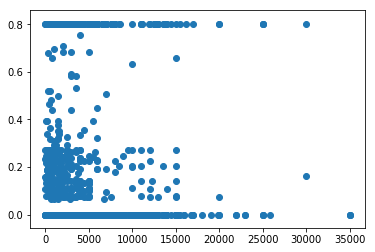

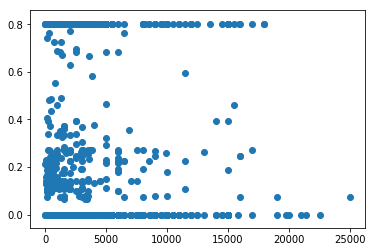

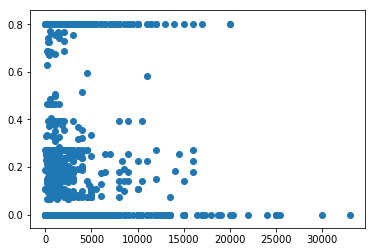

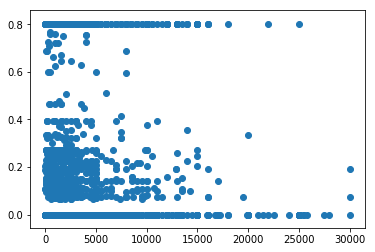

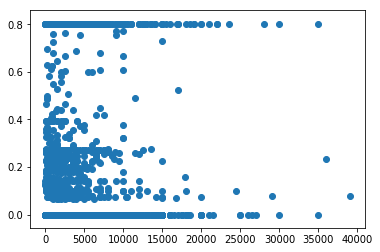

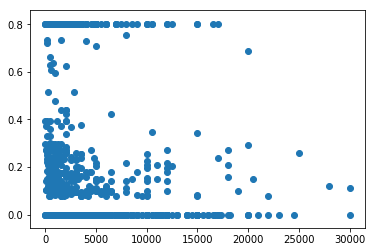

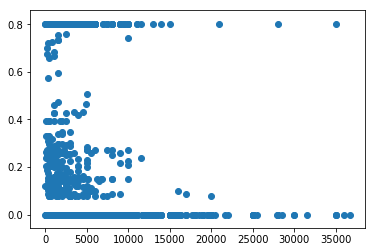

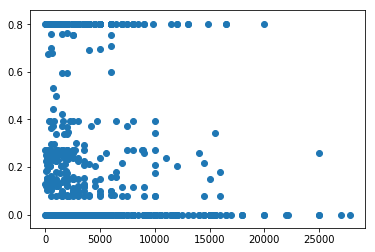

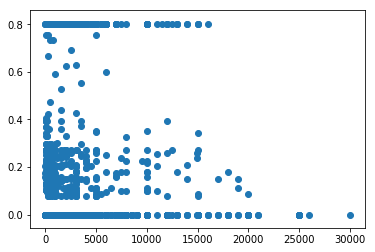

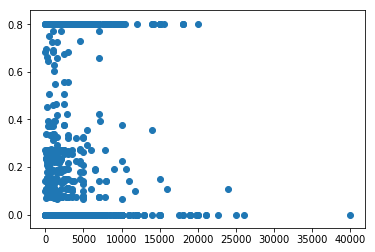

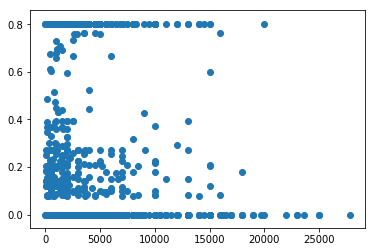

In [203]:
for city in cities:
    df_tmp = df[(df["region"]==city)&(df["price"]<40000)]
    plt.scatter(df_tmp ["price"],df_tmp["deal_probability"])
    plt.show()

In [216]:
from sklearn.neighbors import KNeighborsRegressor

for neighbors in range(1,200):
    knReg = KNeighborsRegressor(neighbors)
    knReg.fit(df["price"].reshape(-1, 1),df["deal_probability"])
    df_tmp = childrenAndToys_validation[~childrenAndToys_validation["price"].isnull()]
    pred = knReg.predict(df_tmp["price"].reshape(-1, 1))
    true = df_tmp["deal_probability"]
    tmp = mean_squared_error(true,pred)
    print("{0} neighbor KNN: {1}".format(neighbors,tmp))

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


1 neighbor KNN: 0.22478006661364652
2 neighbor KNN: 0.18865161175339762
3 neighbor KNN: 0.15556856148018766
4 neighbor KNN: 0.13252331157544572
5 neighbor KNN: 0.12834862485914733
6 neighbor KNN: 0.1227330361876961
7 neighbor KNN: 0.11722597958301974
8 neighbor KNN: 0.11399724739379843
9 neighbor KNN: 0.11386416644137273
10 neighbor KNN: 0.11160856998087314
11 neighbor KNN: 0.11070953729640828
12 neighbor KNN: 0.11003628494583337
13 neighbor KNN: 0.11025347348621563
14 neighbor KNN: 0.1091335371768412
15 neighbor KNN: 0.10784858700635624
16 neighbor KNN: 0.10863801998898148
17 neighbor KNN: 0.10753980540370646
18 neighbor KNN: 0.10712753551336693
19 neighbor KNN: 0.10609367186085811
20 neighbor KNN: 0.10599608221020844
21 neighbor KNN: 0.10602066729877557
22 neighbor KNN: 0.10547260010029852
23 neighbor KNN: 0.10535176880779319
24 neighbor KNN: 0.10523788416992283
25 neighbor KNN: 0.10484204132941331
26 neighbor KNN: 0.1045331496265357
27 neighbor KNN: 0.10413822206465102
28 neighbor K

KeyboardInterrupt: 

In [227]:
reigions = childrenAndToys_train["region"].unique()
reigonMap = dict(zip(reigions,range(len(regions))))

#df["region"] = df["region"].map(lambda x : reigonMap[x])

df_tmp = childrenAndToys_validation[~childrenAndToys_validation["price"].isnull()]
df_tmp ["region"] = df_tmp["region"].map(lambda x : reigonMap[x])

for neighbors in range(1,200):
    knReg = KNeighborsRegressor(neighbors)
    knReg.fit(df[["price","region"]],df["deal_probability"])
    pred = knReg.predict(df_tmp[["price","region"]])
    true = df_tmp["deal_probability"]
    tmp = mean_squared_error(true,pred)
    print("{0} neighbor KNN: {1}".format(neighbors,tmp))

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1 neighbor KNN: 0.20733723672077267
2 neighbor KNN: 0.15469272513253204
3 neighbor KNN: 0.13821420129643922
4 neighbor KNN: 0.12870498975370018
5 neighbor KNN: 0.12120776715835162
6 neighbor KNN: 0.1169326735639839
7 neighbor KNN: 0.11519122117075731
8 neighbor KNN: 0.11256694322700429
9 neighbor KNN: 0.11101968269740034
10 neighbor KNN: 0.11012042485261438
11 neighbor KNN: 0.1087884165575615
12 neighbor KNN: 0.10808580513620264
13 neighbor KNN: 0.10767458742499704
14 neighbor KNN: 0.10682194660725956
15 neighbor KNN: 0.1062736609911258
16 neighbor KNN: 0.10595655376894973
17 neighbor KNN: 0.10561177617908532
18 neighbor KNN: 0.10536160057407937
19 neighbor KNN: 0.10505744847802119
20 neighbor KNN: 0.10501015379359291
21 neighbor KNN: 0.10479274682227112
22 neighbor KNN: 0.10463634926763206
23 neighbor KNN: 0.10447108824329919
24 neighbor KNN: 0.10432809747900464
25 neighbor KNN: 0.10407628928469986
26 neighbor KNN: 0.10387717046882701
27 neighbor KNN: 0.10388731018601122
28 neighbor K

KeyboardInterrupt: 

In [221]:
reigonMap[reigions[1]]

1

In [154]:
df = childrenAndToys_validation[~childrenAndToys_validation["price"].isnull()]
pred = model.predict(df["price"])
true = df["deal_probability"]
tmp = mean_squared_error(true,pred)
print(tmp)

0.10451908408183637


In [144]:
from sklearn import tree

df = childrenAndToys_train[~childrenAndToys_train["price"].isnull()]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(df["price"].reshape(-1, 1),df["deal_probability"])

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [145]:
df = childrenAndToys_validation[~childrenAndToys_validation["price"].isnull()]

pred = clf.predict(df["price"].reshape(-1, 1))
true = df["deal_probability"]
tmp = mean_squared_error(true,pred)
print(tmp)

0.10172311554750077


C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
true[0:10]

1212003   0.803
260482    0.000
1377533   0.803
1197010   0.803
944936    0.000
30056     0.803
221878    0.000
644381    0.000
1152240   0.000
1388415   0.803
Name: deal_probability, dtype: float64

In [103]:
pred[0:10]

array([0.27786565, 0.21852318, 0.14729927, 0.1951294 , 0.2466644 ,
       0.248714  , 0.2710276 , 0.26311099, 0.19399012, 0.27786565])

In [ ]:
p = lambda x : deal_prob({"region":x["region"],"price":x["price"]})
tmp = losses.mean_squared_error(childrenAndToys_validation["deal_probability"],
                                childrenAndToys_validation.apply(p,axis=1))
K.eval(tmp)

In [ ]:
tst = {}
tst[("t")]

In [ ]:
p = lambda x : deal_prob({"region":x})
print(p('Ростовская область'))
print(p(None))